## Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## Import Data

In [2]:
# Path

path = r'C:\Users\micky\OneDrive\Documents\Data Analytics Course\Data Immersion\Achievement 6\Citibike Project'

In [3]:
# Import citibike_clean as cb_df

cb_df = pd.read_csv(os.path.join(path, 'Data', 'citibike_clean.csv'), index_col = False)

In [4]:
# Check cb_df

cb_df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,end_time,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,birth_year,gender
0,0,LnQzQk,16013,Mon,18,9/9/2013 18:18,9/9/2013 18:35,993,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,1968.0,2
1,1,IL9boN,15230,Thu,18,9/12/2013 18:38,9/12/2013 18:48,581,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1983.0,1
2,2,46clGB,17942,Wed,19,9/18/2013 19:44,9/18/2013 19:50,361,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1989.0,1
3,3,v7vdFt,19683,Sat,11,9/28/2013 11:54,9/28/2013 12:03,561,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,1988.0,2
4,4,VGBsb5,18024,Sat,18,9/7/2013 18:08,9/7/2013 18:46,2296,521,8 Ave & W 31 St,40.750450,-73.994811,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,NaN,0


In [5]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               49972 non-null  int64  
 1   trip_id                  49972 non-null  object 
 2   bike_id                  49972 non-null  int64  
 3   day_of_week              49972 non-null  object 
 4   start_hour               49972 non-null  int64  
 5   start_time               49972 non-null  object 
 6   end_time                 49972 non-null  object 
 7   trip_duration            49972 non-null  int64  
 8   start_station_id         49972 non-null  int64  
 9   start_station_name       49972 non-null  object 
 10  start_station_latitude   49972 non-null  float64
 11  start_station_longitude  49972 non-null  float64
 12  end_station_id           49972 non-null  int64  
 13  end_station_name         49972 non-null  object 
 14  end_station_latitude  

## Clean Data

### Drop columns:

In [6]:
# Drop multiple columns

cb_df_clean = cb_df.drop(['Unnamed: 0', 'trip_id', 'bike_id', 'start_station_id', 'end_station_id', 'start_time', 'end_time', 'day_of_week', 'start_station_name', 'end_station_name', 'subscriber'], axis=1)

In [7]:
# Check cb_df_clean

cb_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_hour               49972 non-null  int64  
 1   trip_duration            49972 non-null  int64  
 2   start_station_latitude   49972 non-null  float64
 3   start_station_longitude  49972 non-null  float64
 4   end_station_latitude     49972 non-null  float64
 5   end_station_longitude    49972 non-null  float64
 6   birth_year               42993 non-null  float64
 7   gender                   49972 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 3.1 MB


### Check Mixed-Type Data:

In [8]:
for col in cb_df_clean.columns.tolist():
      weird = (cb_df_clean[[col]].applymap(type) != cb_df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (cb_df_clean[weird]) > 0:
        print (col)

#### No mixed-type columns

### Correlations:

In [9]:
# Create a correlation matrix using pandas

cb_df_clean.corr()

,start_hour,trip_duration,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,birth_year,gender
start_hour,1.000000,0.040942,-0.009097,-0.045824,-0.036962,0.007046,0.064049,-0.013796
trip_duration,0.040942,1.000000,-0.025180,-0.007099,-0.043889,0.001239,-0.046076,-0.157968
start_station_latitude,-0.009097,-0.025180,1.000000,0.211761,0.585707,0.078061,-0.046369,-0.012489
start_station_longitude,-0.045824,-0.007099,0.211761,1.000000,0.092929,0.418265,0.028715,0.011463
end_station_latitude,-0.036962,-0.043889,0.585707,0.092929,1.000000,0.200084,-0.042970,-0.019376
end_station_longitude,0.007046,0.001239,0.078061,0.418265,0.200084,1.000000,0.039176,0.000766
birth_year,0.064049,-0.046076,-0.046369,0.028715,-0.042970,0.039176,1.000000,0.068891
gender,-0.013796,-0.157968,-0.012489,0.011463,-0.019376,0.000766,0.068891,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

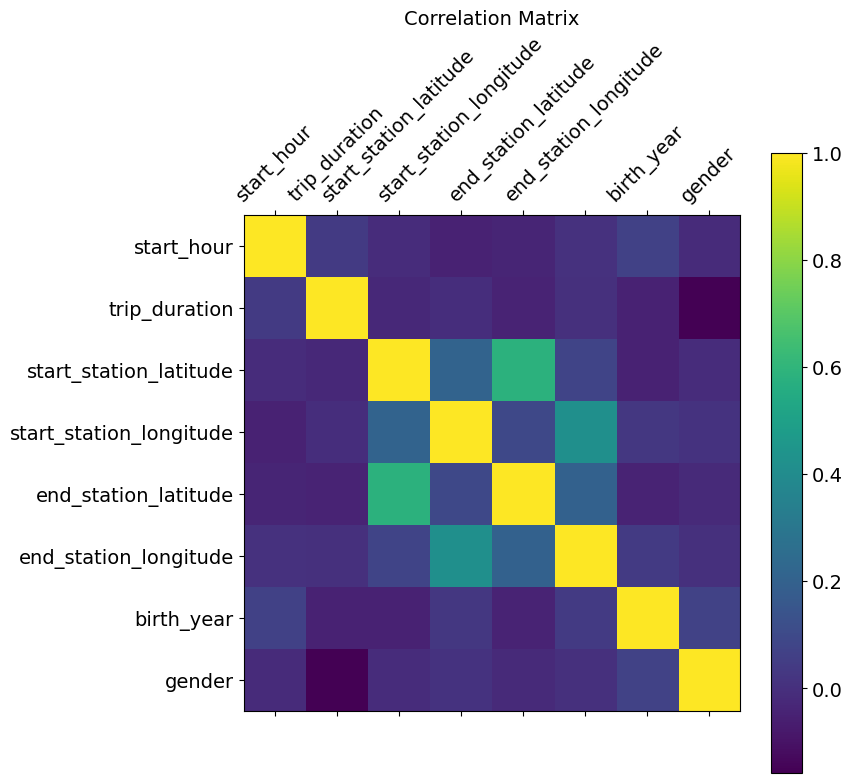

In [10]:
# Create correlations heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(cb_df_clean.corr(), fignum=f.number) # type of plot
plt.xticks(range(cb_df_clean.shape[1]), cb_df_clean.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(cb_df_clean.shape[1]), cb_df_clean.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

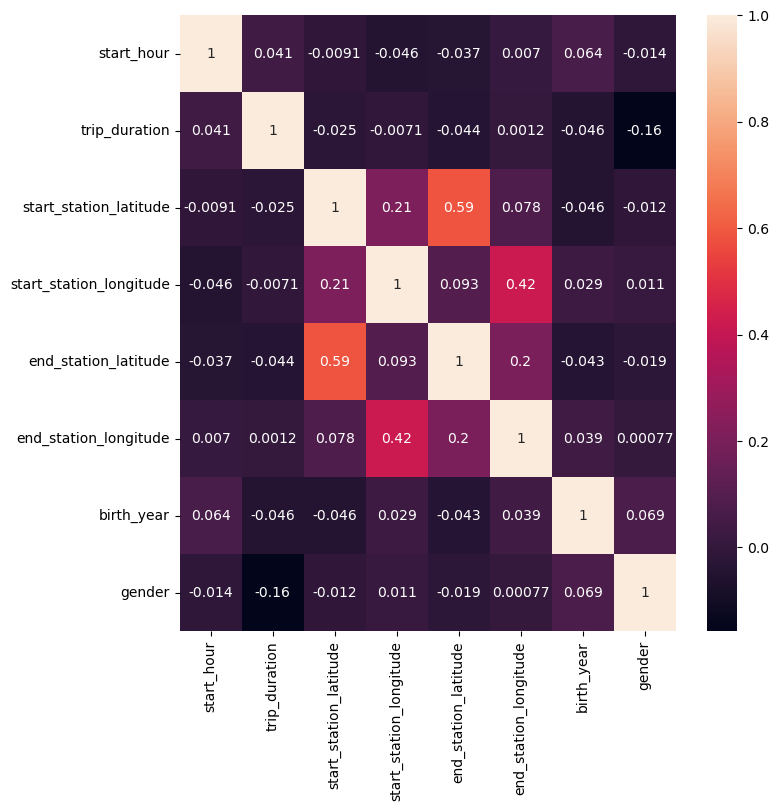

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(cb_df_clean.corr(), annot = True, ax = ax)

##### It doesn't look as if there is much correlation in this data. The longitude and latitude of the start stations and end stations provide the most relevant comparisons, but deal in location.

## Scatterplots

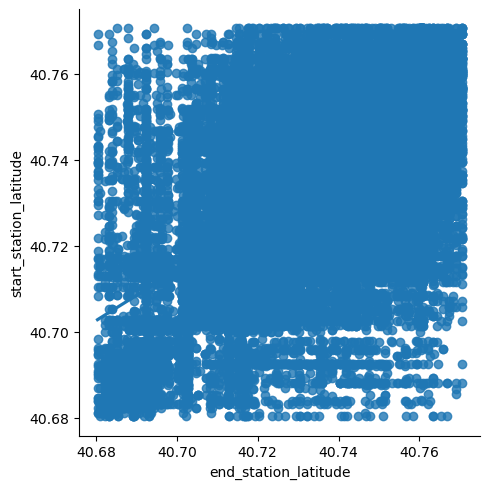

In [12]:
# Create a scatterplot for "end_station_latitude" and "start_station_latitude"

sns.lmplot(x = 'end_station_latitude', y = 'start_station_latitude', data = cb_df)

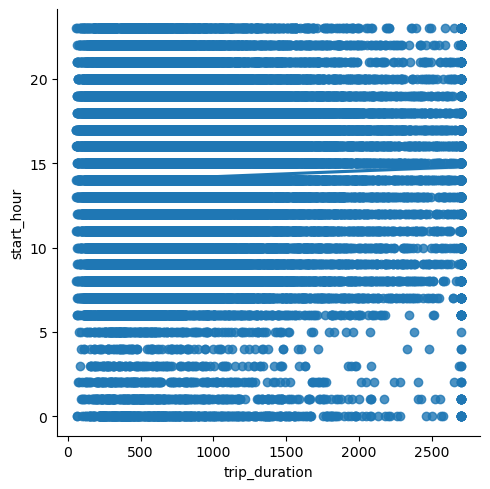

In [13]:
# Create a scatterplot for 'trip_duration' and 'start_hour'

sns.lmplot (x = 'trip_duration', y = 'start_hour', data = cb_df)

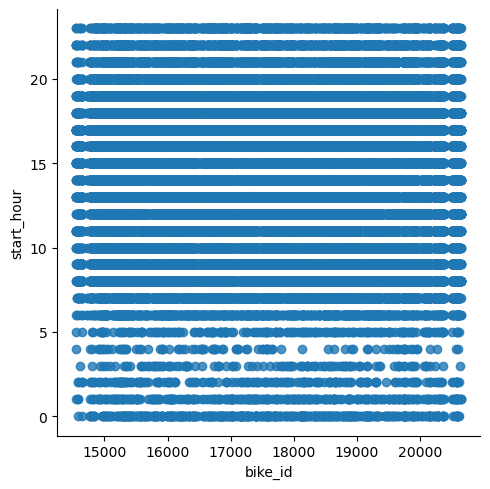

In [14]:
# Create scatterplot for "day_of_week" and "start_hour"

sns.lmplot (x = 'bike_id', y = 'start_hour', data = cb_df)

# Originally changed bike_id to object, however, noticed it is an integer and figured I could see how it correlates

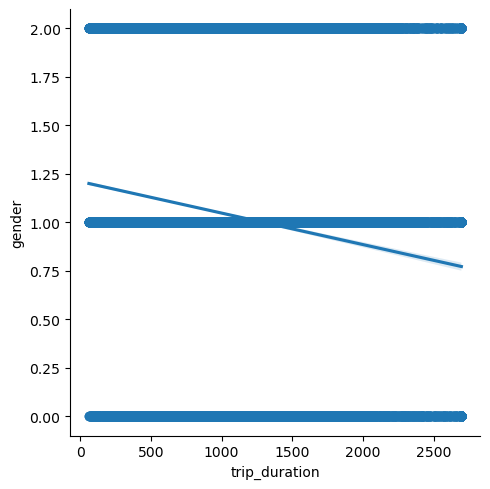

In [15]:
# Create scatterplot for "trip_duration" and "gender"

sns.lmplot (x = 'trip_duration', y = 'gender', data = cb_df)

##### I feel like not much information can be gathered from the correlation of this data, especially through scatterplots.

## Pair Plot

In [16]:
cb_df_clean2 = cb_df[['start_hour', 'trip_duration', 'birth_year', 'gender']]

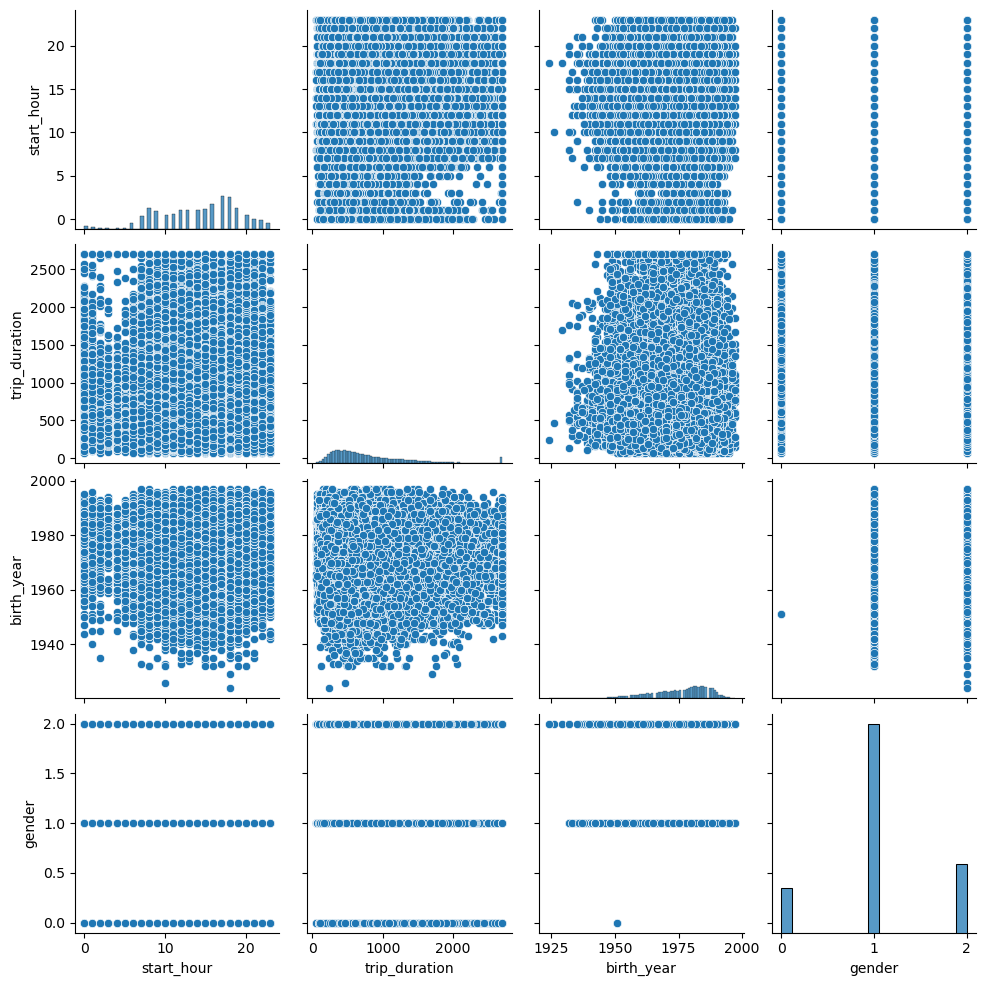

In [17]:
# Create a pair plot

g = sns.pairplot(cb_df_clean2)

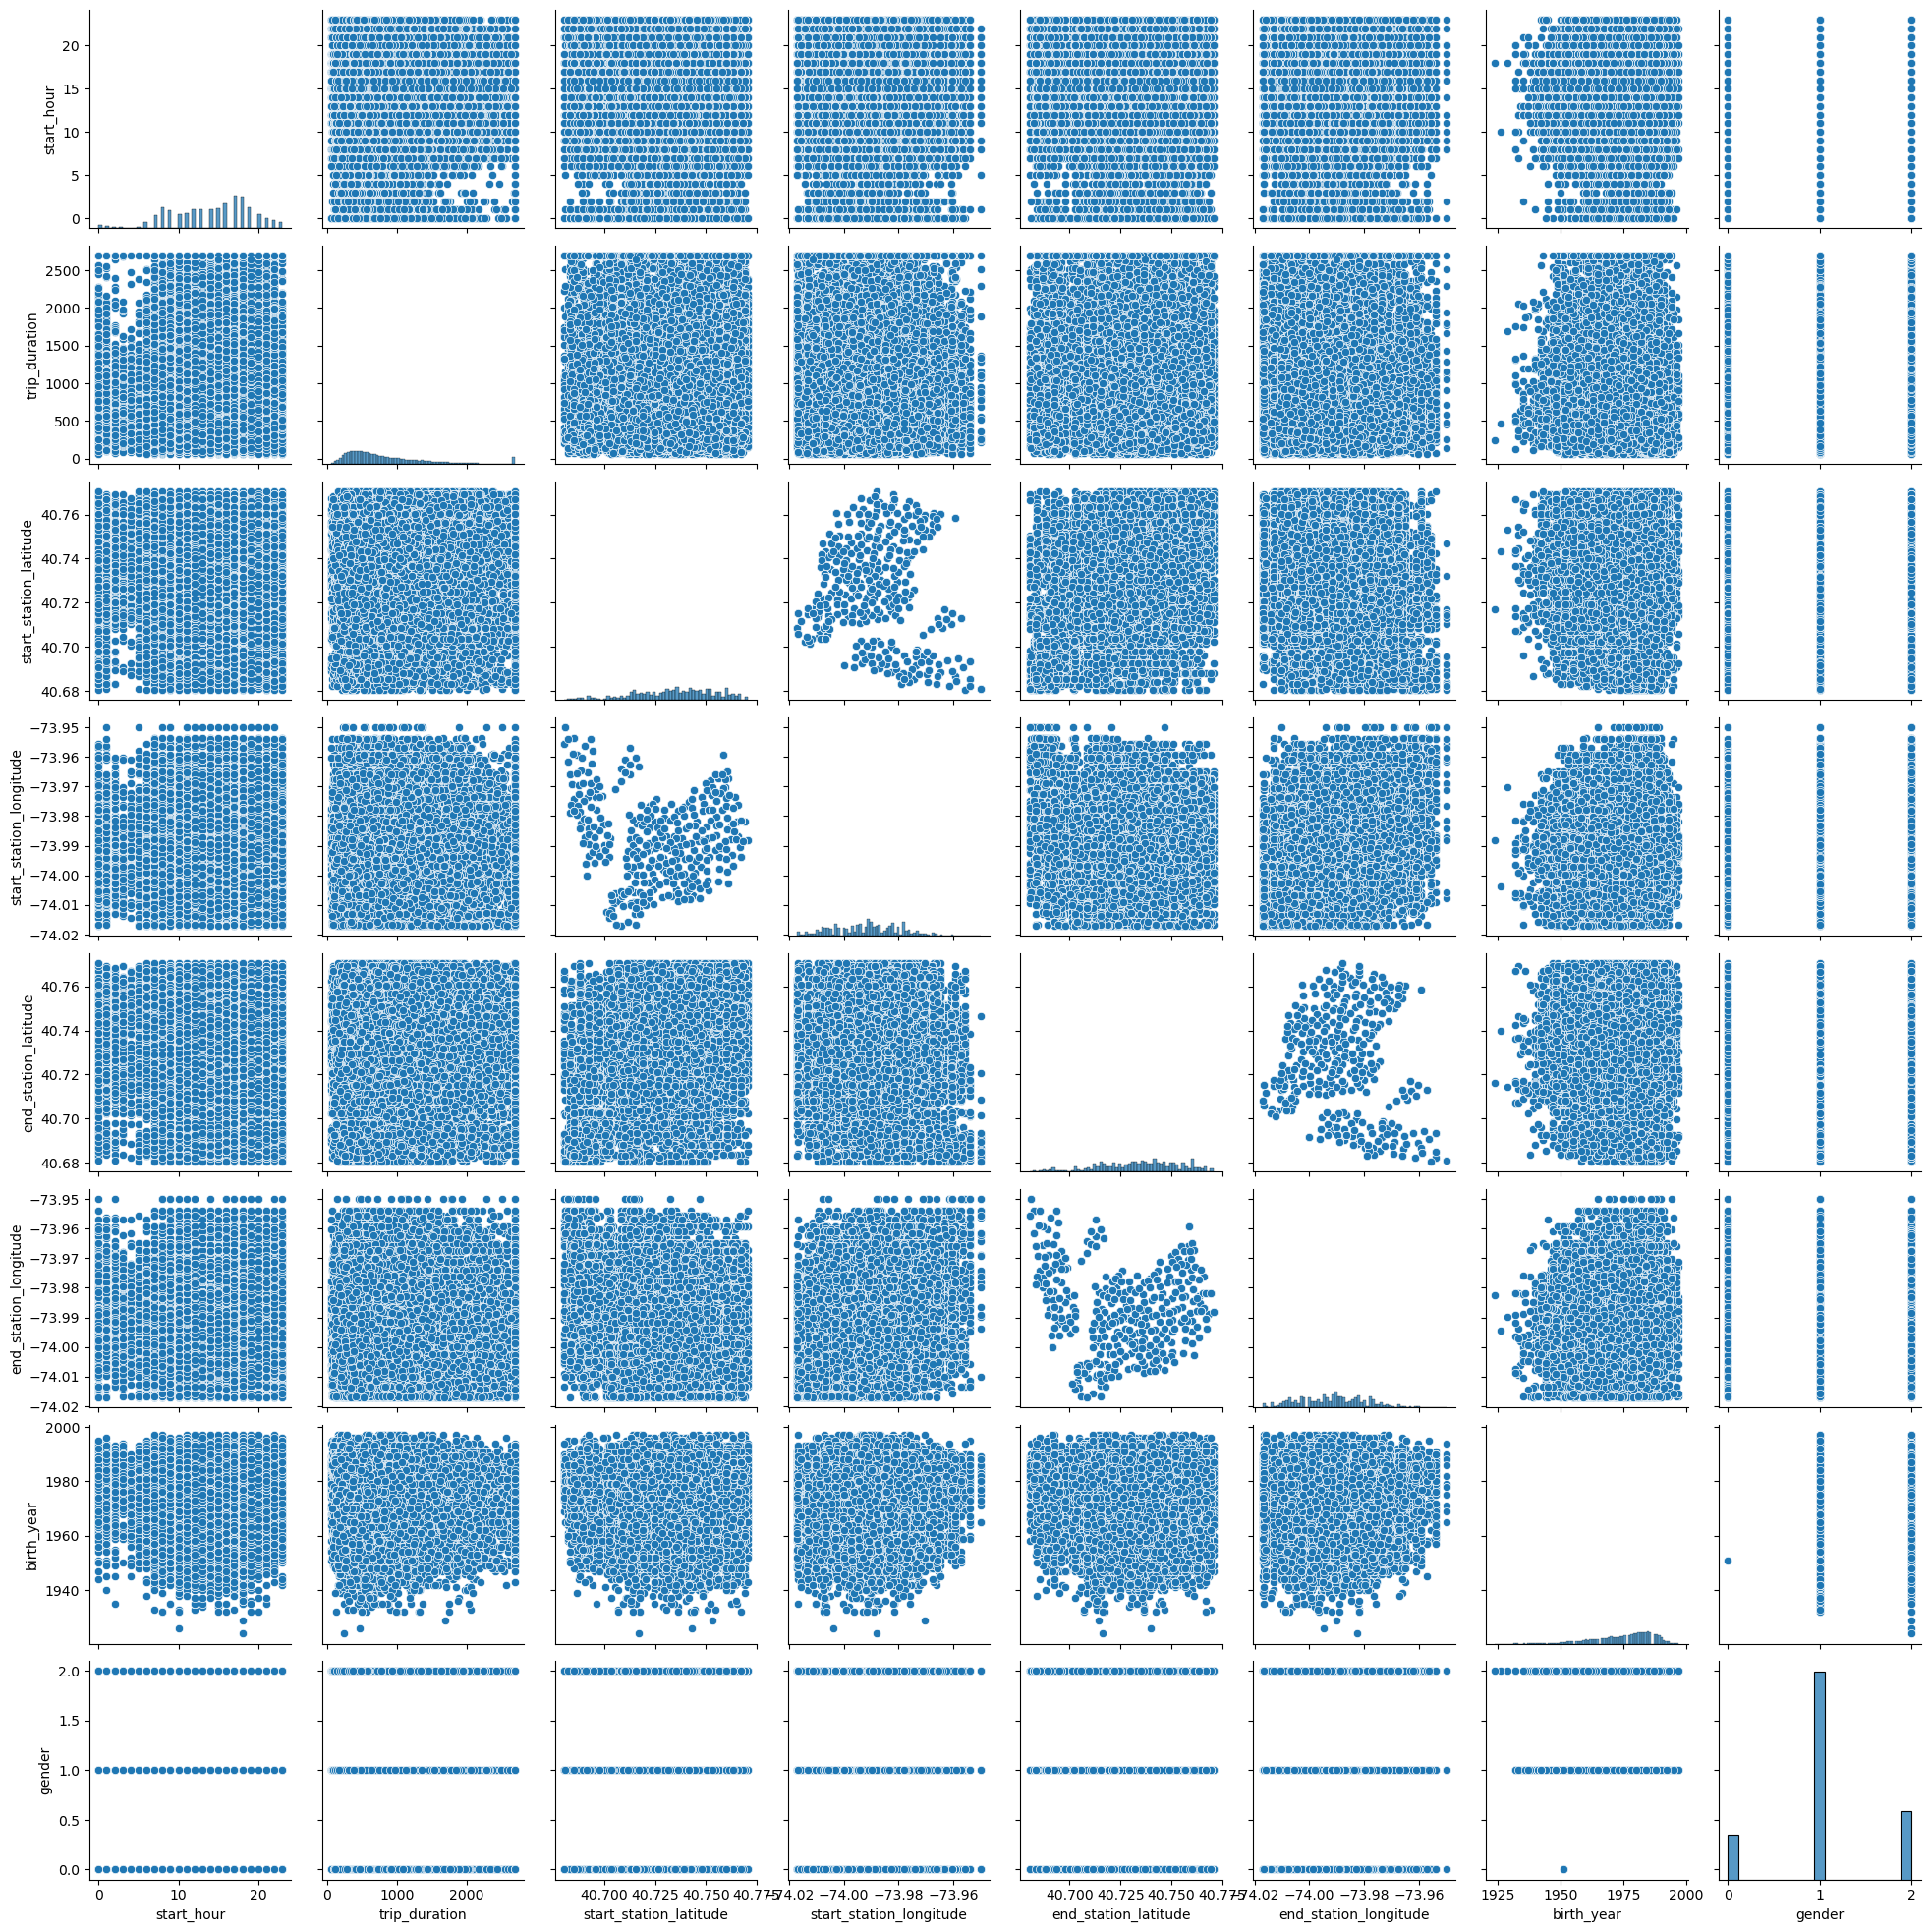

In [18]:
# Create a pair plot

g = sns.pairplot(cb_df_clean)

##### The data still shows that not much information can be gathered through the correlation of this data set.
##### Some variables I'd like to look into further are trip_duration, because I feel it can have a major impact on how Citi Bike is used and availability. Birth_year, because I can find what age group is mainly using Citi Bike. And gender, because it tends to provide more insight into who is subscribing and utilizing Citi Bike.

## Categorical Plot

<Axes: xlabel='trip_duration', ylabel='Count'>

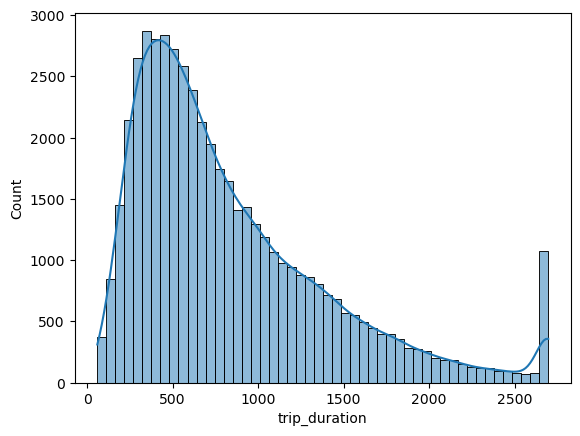

In [22]:
# Create Histogram to visualize the distribution of the variables.

sns.histplot(cb_df['trip_duration'], bins = 50, kde = True)

In [25]:
cb_df.loc[cb_df['trip_duration'] <500, 'Trip Category'] = 'Short Trip'

In [26]:
cb_df.loc[(cb_df['trip_duration'] >=500) & (cb_df['trip_duration'] < 1000), 'Trip Category'] = 'Medium Trip'

In [27]:
cb_df.loc[cb_df['trip_duration'] >=1000, 'Trip Category'] = 'Longer Trip'

In [28]:
cb_df['Trip Category'].value_counts(dropna = False)

Medium Trip    18112
Short Trip     16906
Longer Trip    14954
Name: Trip Category, dtype: int64

In [29]:
cb_df.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'day_of_week', 'start_hour',
       'start_time', 'end_time', 'trip_duration', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'subscriber',
       'birth_year', 'gender', 'Trip Category'],
      dtype='object')

C:\Users\micky\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


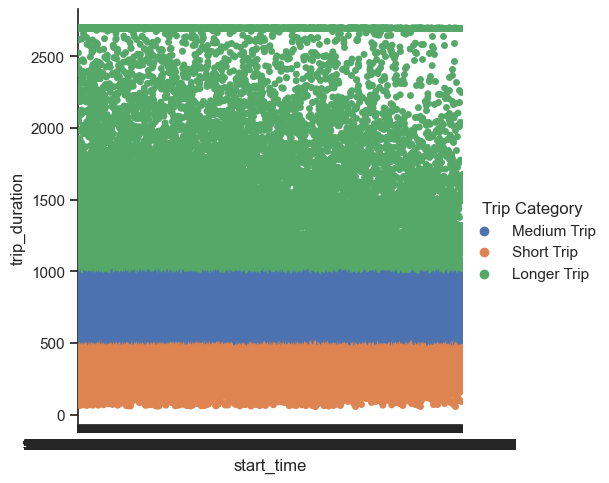

In [30]:
# Create a categorical plot in seaborn using the trip category

sns.set(style="ticks")
g = sns.catplot(x="start_time", y="trip_duration", hue="Trip Category", data=cb_df)

In [31]:
cwd = os.getcwd()
cwd

'C:\\Users\\micky\\OneDrive\\Documents\\Data Analytics Course\\Data Immersion\\Achievement 6\\Citibike Project\\Script'

In [32]:
# Save figure

g.savefig("start_trip.png")

## Questions

### It doesn't look like any questions could be answered from this information gathered.
#### Data did not have good correlation